In [101]:
import random
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
from sklearn import cluster
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.svm import SVC,LinearSVC

#initialization of var and arrays
d_val = 96
all_feature_vectors = []
actual_activities = []
inner_files = []
big_folder = "/Users/ramya/Desktop/HMP_Dataset/"

In [102]:
#need to access every file
activities = ['Liedown_bed', 'Walk', 'Eat_soup', 'Getup_bed', 'Descend_stairs', 'Use_telephone', 'Standup_chair', 'Brush_teeth', 'Climb_stairs', 'Sitdown_chair', 'Eat_meat', 'Comb_hair', 'Drink_glass', 'Pour_water' ]

for every_folder in activities:
    this =  big_folder + every_folder
    for (path, name_of_path, bigfile) in os.walk(this):
        for every_file in bigfile:
            #reads every row from the opened file and stores in all_data array
            read_data = pd.read_table(open(os.path.join(path, every_file), 'r'), sep='\s+', names = ["xdim", "ydim", "zdim"])
            all_data = read_data.values.tolist()
            
            #put all the list of lists in one big list called files_data 
            files_data = []
            for sublist in all_data:
                for x in sublist:
                    files_data.append(x)
                    
            #calculate the total number of data values in that signal        
            length_of_files_data = len(files_data)
            amount_to_subtract = len(files_data)% d_val
            count_of_data_values = length_of_files_data - (amount_to_subtract)
        
            #will split that particular signal into 96 pieces
            x = 0;
            while True: 
                inner_files.append(files_data[x : x + d_val])
                x = x + d_val
                if x >= count_of_data_values:
                    break;

In [103]:
#check1
print(len(inner_files[0]))
print(len(inner_files[len(inner_files) - 1]))
print(len(inner_files))

96
96
13544


In [104]:
#using given k value
kMeans = KMeans(n_clusters = 480)
kMeans.fit(inner_files)
#perform k means for every folder and file in activities
for every_folder in activities:
    this = big_folder + every_folder
    for (path, name_of_path, bigfile) in os.walk(this):
        for every_file in bigfile:
            #initializes a feature array of k indexes and a divided signals array 
            feature_vector_array = [0] * 480
            divided_signal = []
            
            #add name of this file to array of data_names- used later for testing data        
            actual_activities.append(every_folder)   
            
            #reads the data of that particular file   
            read_data = pd.read_table(open(os.path.join(path, every_file), 'r'), sep='\s+', names = ["xdim", "ydim", "zdim"])
            all_data = read_data.values.tolist()
           
            #put all the list of lists in one big list called files_data
            files_data = []
            for sublist in all_data:
                for x in sublist:
                    files_data.append(x)
        
            #do this to know how many times to cluster the d-divided data, aka "count_of_data_values" times
            length_of_files_data = len(files_data)
            amount_to_subtract = len(files_data)% d_val
            count_of_data_values = length_of_files_data - (amount_to_subtract)
        
            #use k means to determine what cluster each piece, of the divided signal, falls in
            x = 0;
            while True:
                divided_signal = np.asarray(files_data[x : x + d_val])
                divided_signal = divided_signal.reshape(1, -1)
     
                #Predict the closest cluster each sample in temp array belongs to.
                cluster = kMeans.predict(divided_signal)

                feature_vector_array[cluster[0]] += 1
                x = x + d_val
                
                if x >= count_of_data_values:
                    break
                
            #generated k-dim feature vectors for each signal/file
            all_feature_vectors.append(feature_vector_array)        

In [105]:
#split training and test data
#use train_test_split from package (array, options) in this cause(predictor array, data_names)
training_data, test_data, training_labels, test_labels = train_test_split(all_feature_vectors, actual_activities, test_size = 0.20)

#Use SVC to classify the data - google
clf = LinearSVC()

clf.fit(training_data, training_labels)
classified_activities = clf.predict(test_data)

#print(classified_activities)
#print(test_labels)

/Users/ramya/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [106]:
#calculates the accuracy
accuracy = metrics.accuracy_score(test_labels, classified_activities)
print(accuracy)
#calculates the error
error = 1 - accuracy
print(error)
#calculates the confusion matrix
metrics.confusion_matrix(test_labels, classified_activities)

0.6964285714285714
0.3035714285714286


array([[ 1,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0],
       [ 0, 15,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  7],
       [ 0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  1,  0,  0, 20,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  1,  0, 10,  2,  0,  2,  4,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  3,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 17,  1,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  2,  0,  0, 14,  2,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  2,  0,  2,  4, 11,  0,  0],
       [ 0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  2,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0, 19]])

In [116]:
import random
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
from sklearn import cluster
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.svm import SVC,LinearSVC

#initialization of var and arrays
d_val = 90
all_feature_vectors = []
actual_activities = []
inner_files = []
big_folder = "/Users/ramya/Desktop/HMP_Dataset/"

In [117]:
#need to access every file
activities = ['Liedown_bed', 'Walk', 'Eat_soup', 'Getup_bed', 'Descend_stairs', 'Use_telephone', 'Standup_chair', 'Brush_teeth', 'Climb_stairs', 'Sitdown_chair', 'Eat_meat', 'Comb_hair', 'Drink_glass', 'Pour_water' ]

for every_folder in activities:
    this = big_folder + every_folder
    #got from google
    for (path, name_of_path, bigfile) in os.walk(this):
        for every_file in bigfile:
            #reads every row from the opened file and stores in all_data array
            read_data = pd.read_table(open(os.path.join(path, every_file), 'r'), sep='\s+', names = ["xdim", "ydim", "zdim"])
            all_data = read_data.values.tolist()
            
            
            #put all the list of lists in one big list called files_data-looked on stack 
            files_data = []
            for sublist in all_data:
                for x in sublist:
                    files_data.append(x)
                    
            #calculate the total number of data values in that signal        
            length_of_files_data = len(files_data)
            amount_to_subtract = len(files_data)% d_val
            count_of_data_values = length_of_files_data - (amount_to_subtract)
        
            #will split that particular signal into 96 pieces
            x = 0;
            while  x < count_of_data_values: 
                inner_files.append(files_data[x : x + d_val])
                x = x + d_val

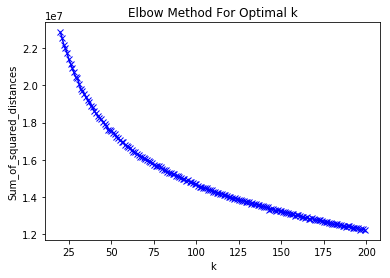

In [3]:
Sum_of_squared_distances = []
K = range(20,200)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(inner_files)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [118]:
#based on elbow curve I notice the knee of the curve is around 90-100 so I will try those k values until I find the best one
#90 performed best as the k value
kMeans = KMeans(n_clusters = 90)
kMeans.fit(inner_files)
#perform k means for every folder and file in activities
for every_folder in activities:
    this = big_folder + every_folder
    for (path, name_of_path, bigfile) in os.walk(this):
        for every_file in bigfile:
            #initializes a feature array of k indexes and a divided signals array 
            feature_vector_array = [0] * 90
            divided_signal = []
            
            #add name of this file to array of data_names- used later for testing data        
            actual_activities.append(every_folder)   
            
            #reads the data of that particular file   
            read_data = pd.read_table(open(os.path.join(path, every_file), 'r'), sep='\s+', names = ["xdim", "ydim", "zdim"])
            all_data = read_data.values.tolist()
            
           
            #put all the list of lists in one big list called files_data-looked on stack
            files_data = []
            for sublist in all_data:
                for x in sublist:
                    files_data.append(x)
        
            #do this to know how many times to cluster the d-divided signals, aka "count_of_data_values" times
            length_of_files_data = len(files_data)
            amount_to_subtract = len(files_data)% d_val
            count_of_data_values = length_of_files_data - (amount_to_subtract)
        
            #use k means to determine what cluster each piece, of the divided signal, falls in
            x = 0;
            while x < count_of_data_values:
                divided_signal = np.asarray(files_data[x : x + d_val]).reshape(1, -1)
     
                #Predict the closest cluster each sample in temp array belongs to.
                cluster = kMeans.predict(divided_signal)

                feature_vector_array[cluster[0]] += 1
                x = x + d_val
                
            #generated k-dim feature vectors for each signal/file
            all_feature_vectors.append(feature_vector_array)        

In [119]:
#split training and test data
#use train_test_split from package (array, options) in this cause(predictor array, data_names)
training_data, test_data, training_labels, test_labels = train_test_split(all_feature_vectors, actual_activities, test_size = 0.20)

#Use SVC to classify the data
clf = LinearSVC()

clf.fit(training_data, training_labels)
classified_activities = clf.predict(test_data)

#print(classified_activities)
#print(test_labels)

/Users/ramya/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [120]:
#calculates the accuracy
accuracy = metrics.accuracy_score(test_labels, classified_activities)
print(accuracy)
#calculates the error
error = 1 - accuracy
print(error)
#calculates the confusion matrix
metrics.confusion_matrix(test_labels, classified_activities)


#classifier performs better!

0.7738095238095238
0.22619047619047616


array([[ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 13,  0,  3,  0,  0,  1,  2,  0,  0,  1,  0,  2],
       [ 0,  0,  9,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 18,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  1, 13,  1,  0,  1,  3,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  1,  3,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 20,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 13,  4,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  3,  0,  0,  0, 14,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  1,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0, 16]])